In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

In [85]:
ls data/

FEDFUNDS.csv  GDP.csv       ^GSPC.csv


In [105]:
pd.to_datetime('2007-02-20')

Timestamp('2007-02-20 00:00:00')

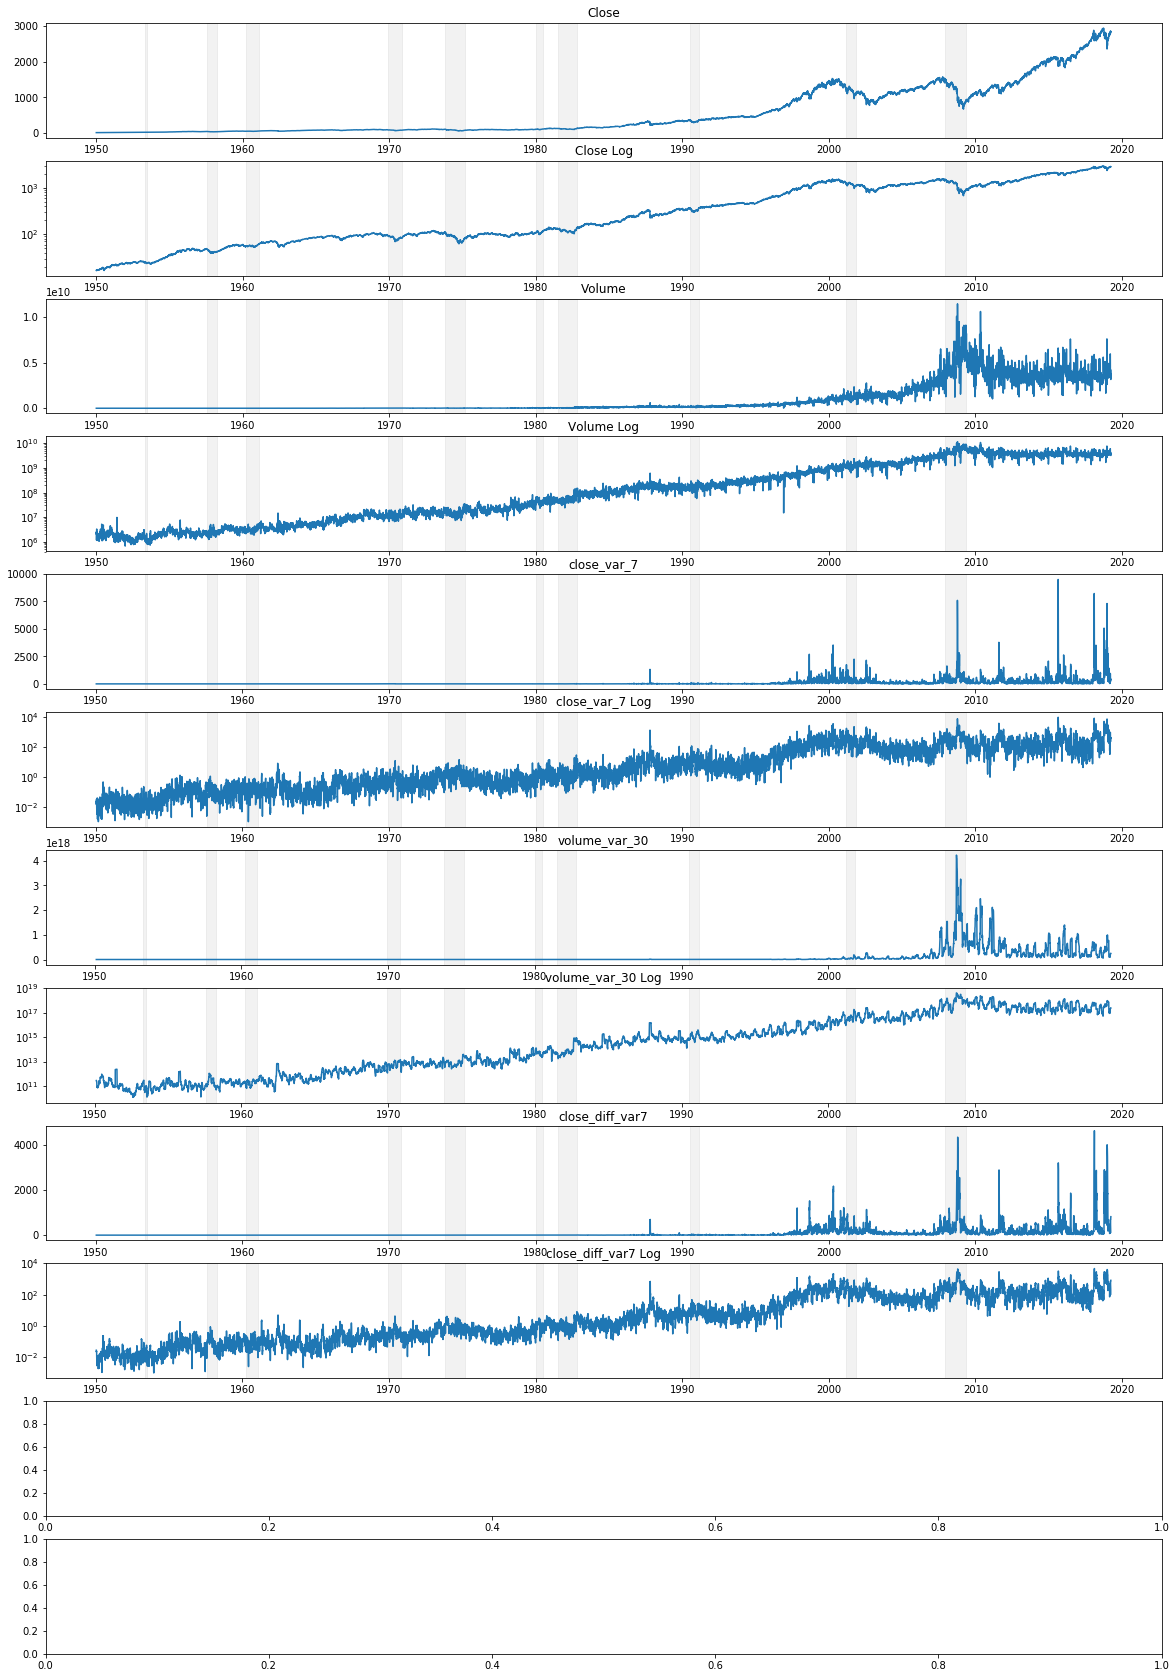

In [107]:
sandp_df = pd.read_csv('data/^GSPC.csv', sep=',')
sandp_df['Date'] = pd.to_datetime(sandp_df['Date'])
sandp_df = sandp_df.set_index('Date')
# sandp_df = sandp_df.loc['2005-1-1':'2012-1-1']

# [(start, end)]
# https://www.thebalance.com/the-history-of-recessions-in-the-united-states-3306011
# https://en.wikipedia.org/wiki/List_of_economic_crises

recessions = [
    ('1953-07-01', '1953-05-01'), # Post Korean War 6.1% unemployment
    ('1957-08-01', '1958-04-01'), # 7.5% unemployment
    ('1960-04-01', '1961-02-01'), # Richard Nixon 7.1% unemployment
    ('1969-12-01', '1970-11-01'), # 6.1% unemployment (mild)
    ('1973-11-01', '1975-03-01'), # OPEC - 9% unemployment
    ('1980-01-01', '1980-07-01'), # 
    ('1981-07-01', '1982-11-01'), # 10% unemployment
    ('1990-07-01', '1991-03-01'), # 7.8% unemployment
    ('2001-03-01', '2001-11-01'), # Y2K 6.3% unemployment
    ('2007-12-01', '2009-05-01'), # 2008
]

def plot_recessions(ax):
    for r in recessions:
        ax.axvspan(
            pd.to_datetime(r[0]),
            pd.to_datetime(r[1]),
            alpha=0.1,
            color='gray')
    
#     ax.axvline(x=pd.to_datetime(f'20080915', format='%Y%m%d'), linestyle='dashed', color='grey')
#     ax.axvspan(
#         pd.to_datetime(f'20070220', format='%Y%m%d'),
#         pd.to_datetime(f'20090306', format='%Y%m%d'),
#         alpha=0.1,
#         color='gray')
# #     recession_years = [1918, 1920, 1923, 1927, 1929, 1937, 1945, 1948, 1953, 1957, 1960, 1970, 1974, 1980, 1981, 1990, 2001, 2008]
#     recession_years = [1953, 1957, 1960, 1970, 1974, 1980, 1981, 1990, 2001, 2008]

#     for year in recession_years:
#         dt = pd.to_datetime(f'{year}0101', format='%Y%m%d')
# #         ax.axvline(x=dt, linestyle='dashed', color='grey')

fig, axes = plt.subplots(12,1,figsize=(20,30))
i=0

axes[i].plot(sandp_df['Close'])
axes[i].set_title('Close')
plot_recessions(axes[i])
i += 1

axes[i].plot(sandp_df['Close'])
axes[i].set_yscale('log')
axes[i].set_title('Close Log')
plot_recessions(axes[i])
i += 1

axes[i].plot(sandp_df['Volume'])
axes[i].set_title('Volume')
plot_recessions(axes[i])
i += 1

axes[i].plot(sandp_df['Volume'])
axes[i].set_yscale('log')
axes[i].set_title('Volume Log')
plot_recessions(axes[i])
i += 1

close_var_7 = sandp_df['Close'].rolling(window=7).var()

axes[i].plot(close_var_7)
axes[i].set_title('close_var_7')
plot_recessions(axes[i])
i += 1

axes[i].plot(close_var_7)
axes[i].set_yscale('log')
axes[i].set_title('close_var_7 Log')
plot_recessions(axes[i])
i += 1

close_var_30 = sandp_df['Close'].rolling(window=30).var()

# axes[i].plot(close_var_30)
# axes[i].set_title('close_var_30')
# plot_recessions(axes[i])
# i += 1

# axes[i].plot(close_var_30)
# axes[i].set_yscale('log')
# axes[i].set_title('close_var_30 Log')
# plot_recessions(axes[i])
# i += 1

volume_var_30 = sandp_df['Volume'].rolling(window=30).var()

axes[i].plot(volume_var_30)
axes[i].set_title('volume_var_30')
plot_recessions(axes[i])
i += 1

axes[i].plot(volume_var_30)
axes[i].set_yscale('log')
axes[i].set_title('volume_var_30 Log')
plot_recessions(axes[i])
i += 1

close_diff_var7 = sandp_df['Close'].diff().rolling(window=7).var()

axes[i].plot(close_diff_var7)
axes[i].set_title('close_diff_var7')
plot_recessions(axes[i])
i += 1

axes[i].plot(close_diff_var7)
axes[i].set_yscale('log')
axes[i].set_title('close_diff_var7 Log')
plot_recessions(axes[i])
i += 1

plt.show()

In [77]:

sandp_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000
1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000
1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000
1950-01-06,16.98,16.98,16.98,16.98,16.98,2010000
1950-01-09,17.08,17.08,17.08,17.08,17.08,2520000


In [78]:
sandp_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-25,2796.010010,2809.790039,2785.020020,2798.360107,2798.360107,3376580000
2019-03-26,2812.659912,2829.870117,2803.989990,2818.459961,2818.459961,3266050000
2019-03-27,2819.719971,2825.560059,2787.719971,2805.370117,2805.370117,3372930000
2019-03-28,2809.399902,2819.709961,2798.770020,2815.439941,2815.439941,3158170000
2019-03-29,2828.270020,2836.030029,2819.229980,2834.399902,2834.399902,3740700000


In [79]:
sandp_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,17422.000000,17422.000000,17422.000000,17422.000000,17422.000000,1.742200e+04
mean,576.186146,579.587836,572.585569,576.312075,576.312075,9.307335e+08
std,686.997628,690.501119,683.191893,687.094989,687.094989,1.554432e+09
min,16.660000,16.660000,16.660000,16.660000,16.660000,6.800000e+05
25%,86.002500,86.677498,85.292502,86.012501,86.012501,8.970000e+06
50%,166.944999,167.629997,166.070000,166.950005,166.950005,9.487500e+07
75%,1097.794983,1105.507508,1091.059998,1097.832519,1097.832519,1.214275e+09
max,2936.760010,2940.909912,2927.110107,2930.750000,2930.750000,1.145623e+10


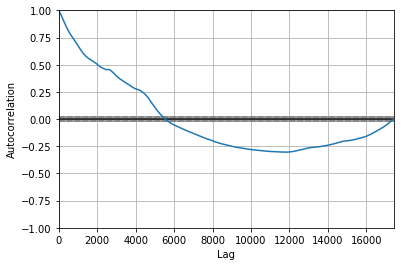

In [80]:
autocorrelation_plot(sandp_df['Close'])
pass